In [1]:
import numpy as np
from LaPALnumpy import *

import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
pi_0_true = np.transpose(np.array([[0.99, 0.0, 0.01, 0.0]]))

# transition kernel 
beta_true  = 0.5  # transmiss rate 
rho_true   = 0.05 # latent period rate
gamma_true = 0.1  # recovery rate

K_eta_true = K_eta_SEIR( beta_true, rho_true, gamma_true)

# no death
delta_true = np.ones((4, 1))

# emission distribution
q_true = np.transpose(np.array([[0.5, 0.1]]))

alpha_true    = np.zeros((4, 1))
kappa_true    =  np.zeros((4, 1))

# no misreporting
G_true = np.eye(4) 

T = 200
n = 100000
MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
X, Y, q_sim = MODEL.run(200)
y = Y[2,1:201]



In [3]:
approx = LaPAL_approx(y, pi_0_true, delta_true[0], K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
lambda_, barlambda, qmean, qvar, logw =  approx.run()

Run the experiments from the PAL paper!

In [4]:
pi_0_true = np.transpose(np.array([[495/500, 0.0, 5/500, 0.0]]))

# transition kernel 
beta_true  = 0.8  # transmiss rate 
rho_true   = 0.1 # latent period rate
gamma_true = 0.2  # recovery rate

K_eta_true = K_eta_SEIR( beta_true, rho_true, gamma_true)

# no death
delta_true = np.ones((4, 1))

# emission distribution
q_true = np.transpose(np.array([[0.5, 0.1]]))

alpha_true    = np.zeros((4, 1))
alpha_true[0] = 0.05
kappa_true    =  np.zeros((4, 1))

# no misreporting
G_true = np.eye(4) 

T = 200
n = 100000
MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
X, Y, q_sim = MODEL.run(T)
y = Y[2,1:201]

In [5]:

q_wrong = np.transpose(np.array([[0.5, 0.1]]))
approx = LaPAL_approx(y, pi_0_true, delta_true[0], K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
lambda_, barlambda, qmean, qvar, logw =  approx.run()

<function matplotlib.pyplot.show(close=None, block=None)>

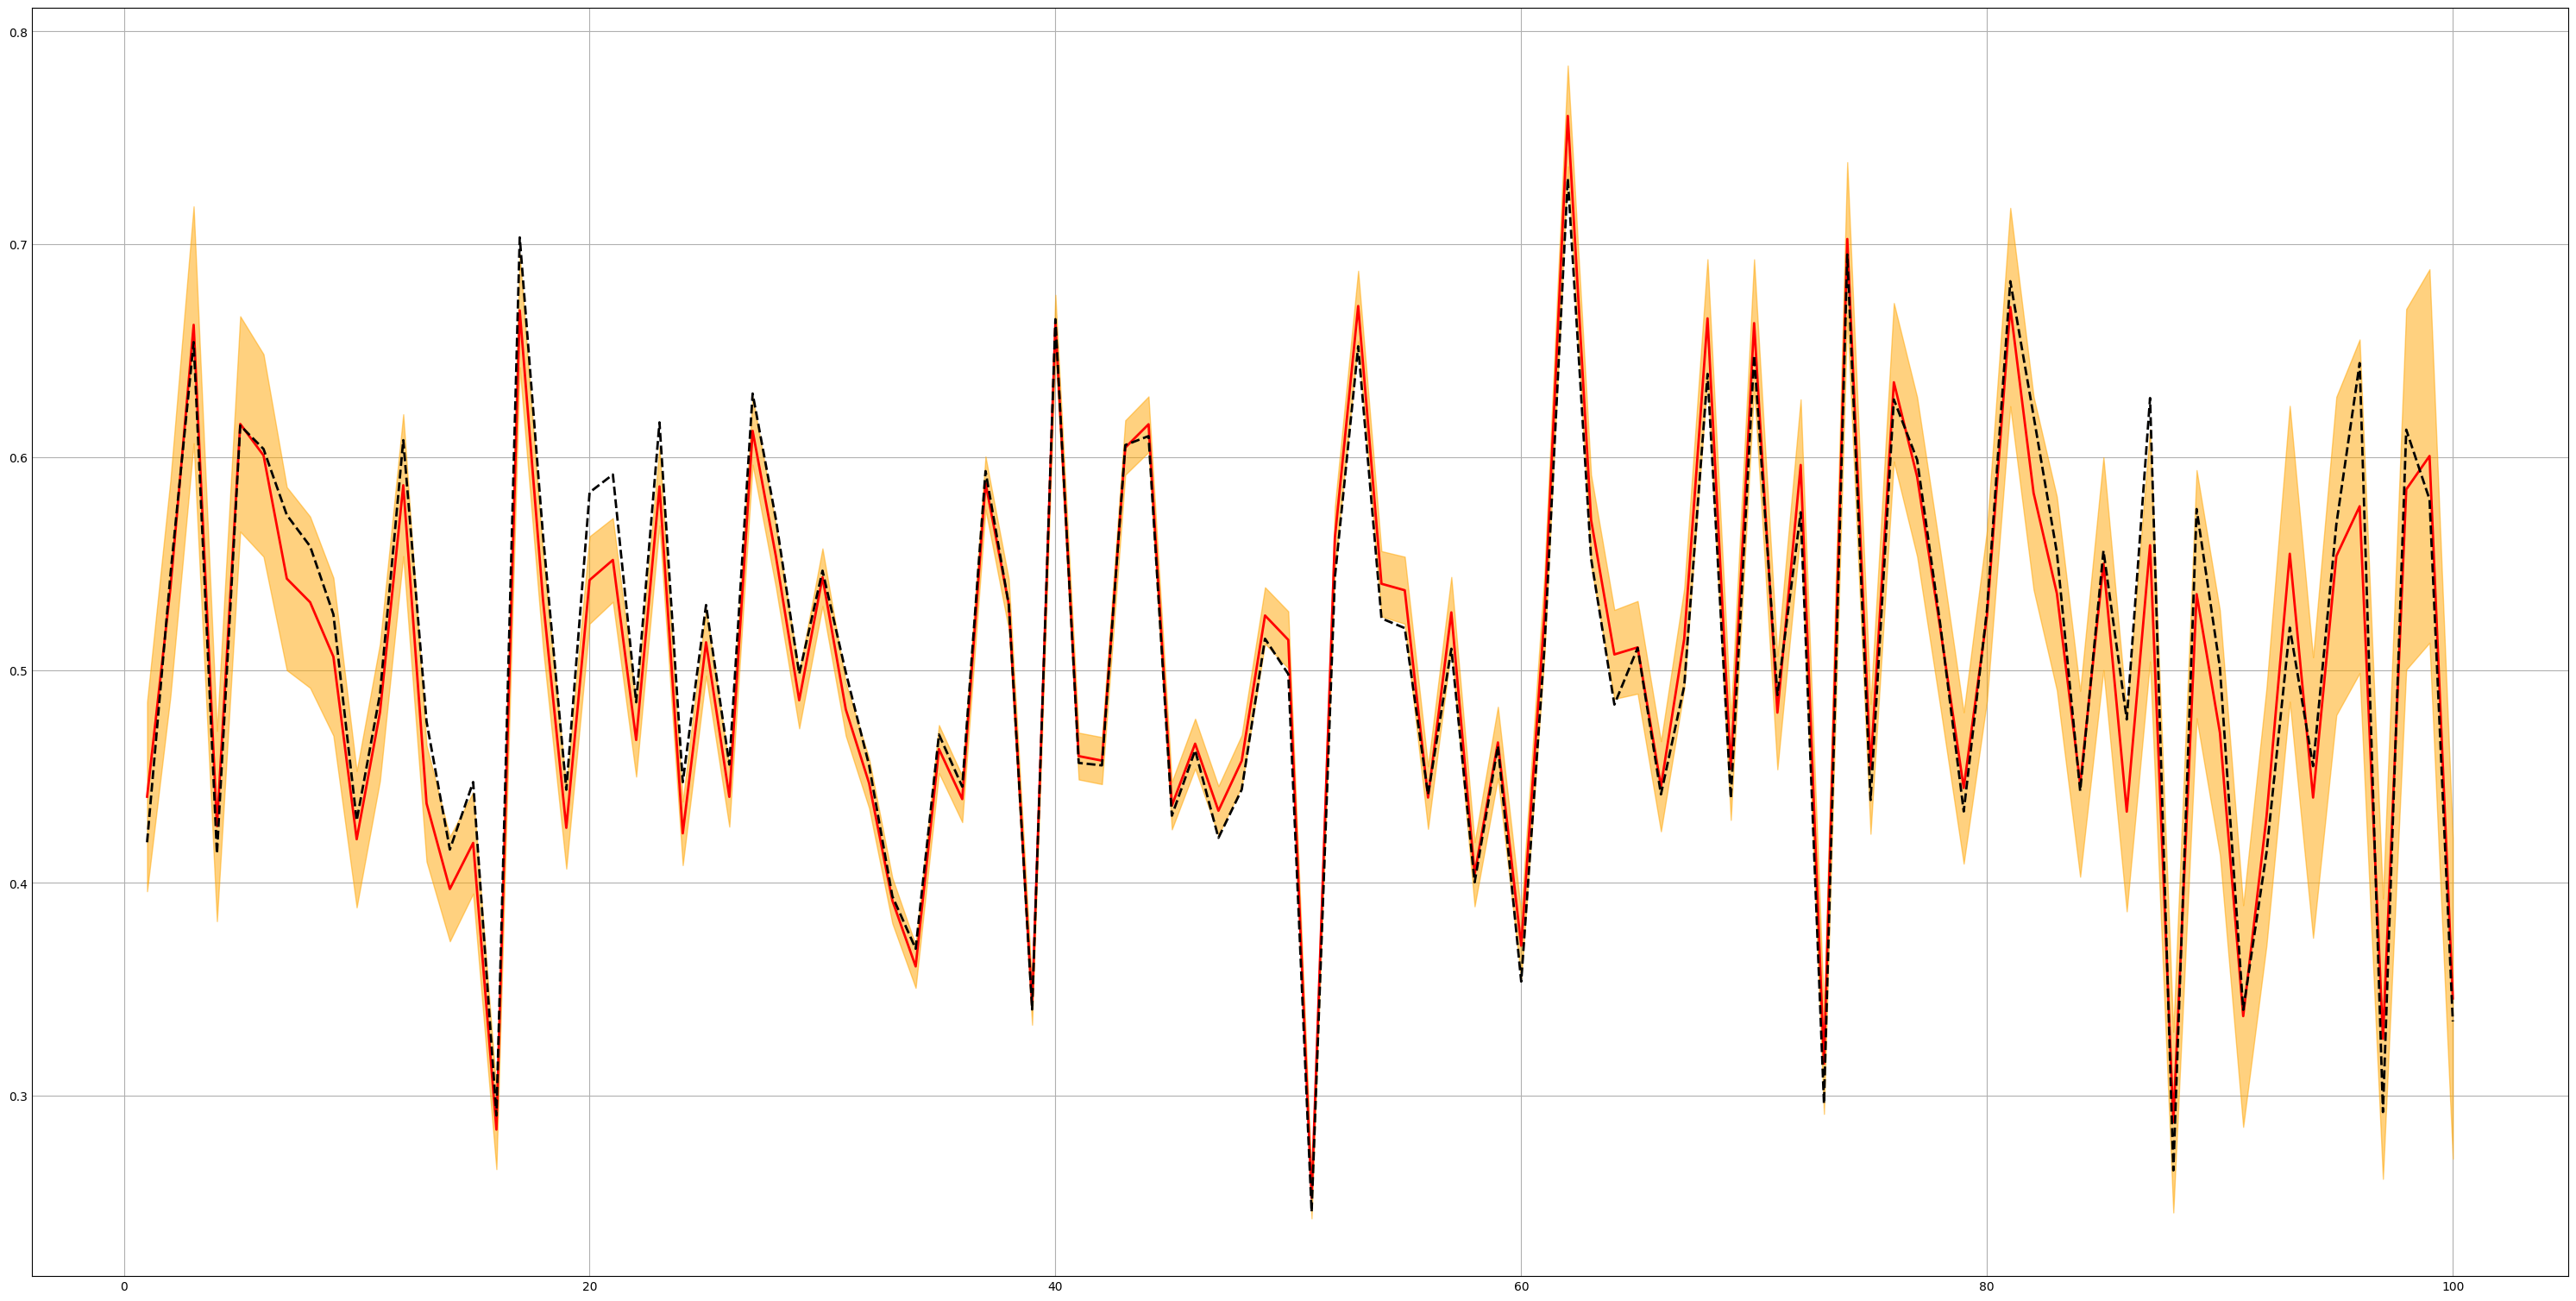

In [6]:

plt.style.use('_mpl-gallery')
fig, ax = plt.subplots(figsize=(30, 15))
upper_bound = qmean + 1.96*np.sqrt(qvar)
lower_bound = qmean - 1.96*np.sqrt(qvar)
xaxis = np.linspace(0,T,T+1)
ax.fill_between(xaxis[1:101], lower_bound[1:101],upper_bound[1:101], color = "orange", alpha = 0.5)
ax.plot(xaxis[1:101], qmean[1:101], linewidth = 2, color = 'red')
ax.plot(xaxis[1:101], q_sim[1:101], linewidth = 2, color = 'black', linestyle = 'dashed')

plt.show

In [17]:
T = 200
n = 1000
MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
X, Y, q_sim = MODEL.run(T)
y = Y[2,1:201]
n = 10000
MODELq = Compartmental_model_q(pi_0_true, delta_true, K_eta_true, alpha_true, q_sim, G_true, kappa_true, n)
X, Y, q_sim = MODELq.run(T)
y = Y[2,1:201]

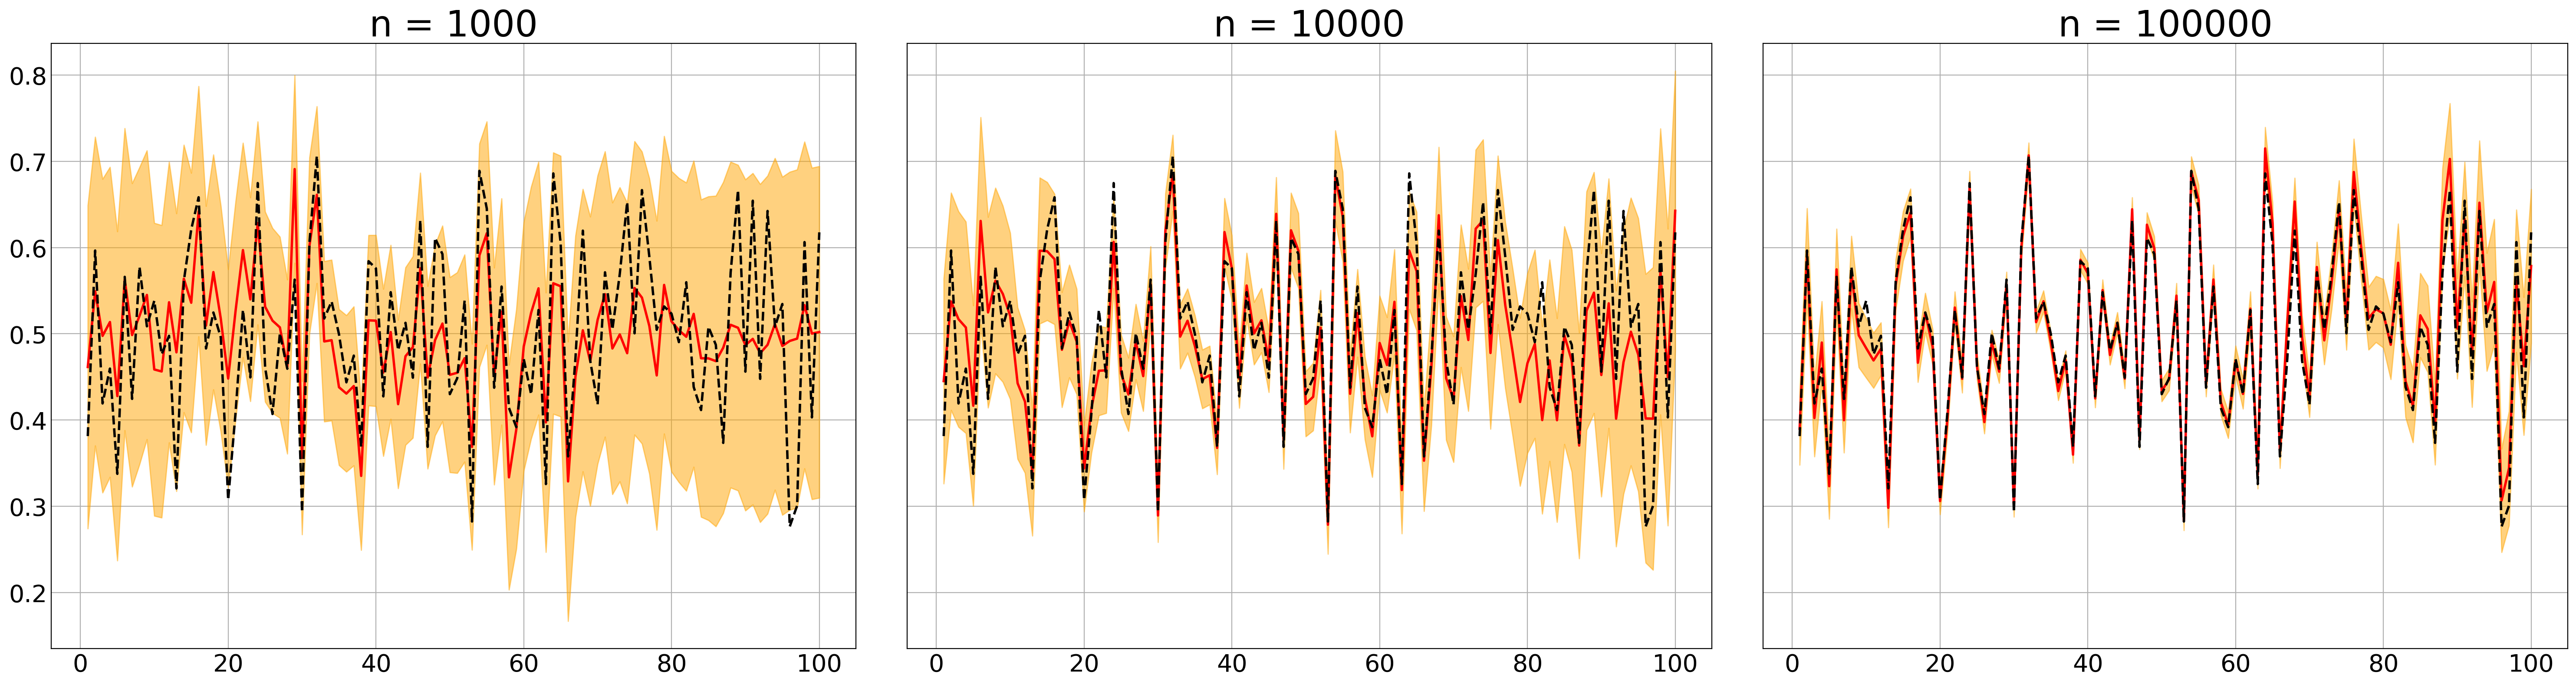

In [42]:
fig, ax = plt.subplots(1, 3, figsize=(30, 8), dpi=200, sharex=True, sharey='row')

# Add titles above each panel
ax[0].set_title('n = 1000', fontsize=30)
ax[1].set_title('n = 10000', fontsize=30)
ax[2].set_title('n = 100000', fontsize=30)
plt.rc('xtick', labelsize=20)  # Increase font size for x-axis numbering
plt.rc('ytick', labelsize=20)  # Increase font size for y-axis numbering
fig.tight_layout()

T = 200
n = 1000
MODEL = Compartmental_model(pi_0_true, delta_true, K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
X, Y, q_sim = MODEL.run(T)
y = Y[2,1:201]
approx = LaPAL_approx(y, pi_0_true, delta_true[0], K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
lambda_, barlambda, qmean, qvar, logw =  approx.run()

upper_bound = qmean + 1.96*np.sqrt(qvar)
lower_bound = qmean - 1.96*np.sqrt(qvar)
xaxis = np.linspace(0,T,T+1)
ax[0].fill_between(xaxis[1:101], lower_bound[1:101],upper_bound[1:101], color = "orange", alpha = 0.5)
ax[0].plot(xaxis[1:101], qmean[1:101], linewidth = 2, color = 'red')
ax[0].plot(xaxis[1:101], q_sim[1:101], linewidth = 2, color = 'black', linestyle = 'dashed')

n = 10000
MODELq = Compartmental_model_q(pi_0_true, delta_true, K_eta_true, alpha_true, q_sim[1:201], G_true, kappa_true, n)
X, Y, q_sim = MODELq.run(T)
y = Y[2,1:201]
approx = LaPAL_approx(y, pi_0_true, delta_true[0], K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
lambda_, barlambda, qmean, qvar, logw =  approx.run()

upper_bound = qmean + 1.96*np.sqrt(qvar)
lower_bound = qmean - 1.96*np.sqrt(qvar)
xaxis = np.linspace(0,T,T+1)
ax[1].fill_between(xaxis[1:101], lower_bound[1:101],upper_bound[1:101], color = "orange", alpha = 0.5)
ax[1].plot(xaxis[1:101], qmean[1:101], linewidth = 2, color = 'red')
ax[1].plot(xaxis[1:101], q_sim[1:101], linewidth = 2, color = 'black', linestyle = 'dashed')

n = 100000
MODELq = Compartmental_model_q(pi_0_true, delta_true, K_eta_true, alpha_true, q_sim[1:201], G_true, kappa_true, n)
X, Y, q_sim = MODELq.run(T)
y = Y[2,1:201]
approx = LaPAL_approx(y, pi_0_true, delta_true[0], K_eta_true, alpha_true, q_true, G_true, kappa_true, n)
lambda_, barlambda, qmean, qvar, logw =  approx.run()

upper_bound = qmean + 1.96*np.sqrt(qvar)
lower_bound = qmean - 1.96*np.sqrt(qvar)
xaxis = np.linspace(0,T,T+1)
ax[2].fill_between(xaxis[1:101], lower_bound[1:101],upper_bound[1:101], color = "orange", alpha = 0.5)
ax[2].plot(xaxis[1:101], qmean[1:101], linewidth = 2, color = 'red')
ax[2].plot(xaxis[1:101], q_sim[1:101], linewidth = 2, color = 'black', linestyle = 'dashed')


